## **Data Analytics HW#6**
* **學號：R10546001**
* **姓名：許世佑**

### **Q1 (a)**

In [4]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv(r"DA_Demo.csv")
X=data.drop("car name",axis = 1).to_numpy()

In [28]:
def FA(dataMat, factor_number):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    # Compute the covariance matrix
    covMat = np.cov(meanRemoved, rowvar=0)
    # Compute the eigenvectors and eigenvalues of the covariance matrix
    eigVal, eigVect = np.linalg.eig(np.mat(covMat))
    selected_eigenvalue = eigVal[:factor_number]
    eigenvalues_diagonal = np.zeros((eigVal.shape[0], eigVal.shape[0]), float)   
    np.fill_diagonal(eigenvalues_diagonal, eigVal)
    eigenvalues_diagonal_total_sqrt = np.sqrt(eigenvalues_diagonal)
    All_T =   eigenvalues_diagonal_total_sqrt @ eigVect
    All = All_T.T
    X_variance = np.diag(np.diag(All_T @ All))
    eigenvalues_diagonal = np.zeros((factor_number, factor_number), float)
    np.fill_diagonal(eigenvalues_diagonal, eigVal[:factor_number])
    eigenvalues_diagonal_sqrt = np.sqrt(eigenvalues_diagonal)
    A_T = eigVect[:, :factor_number] @ eigenvalues_diagonal_sqrt
    A = A_T.T
    Psi = X_variance - A_T @ A
    Psi_inverse = np.linalg.inv(Psi)
    inner = np.linalg.inv(A @ (Psi_inverse) @ (A_T))
    F = dataMat @ Psi_inverse @ (A_T) @ (inner)

    # Compute the correlation matrix
    corr_matrix = np.corrcoef(meanRemoved, rowvar=False)
    # Compute the eigenvectors and eigenvalues of the correlation matrix
    eig_values, eig_vectors = np.linalg.eig(corr_matrix)
    # Sort the eigenvalues and eigenvectors in descending order of eigenvalues
    sorted_indices = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]
    A_Vector = eig_vectors[:, :factor_number] * np.sqrt(eig_values[:factor_number])
    h2 = np.sum(A_Vector ** 2, axis=1)
    psi_test = 1 - h2
    return F, A, h2, psi_test, eigVal, eigVect, selected_eigenvalue, h2, psi_test   

In [30]:
F, A,h2, psi_test,eigVal, eigVect, selected_eigenvalue, h2, psi_test = FA(X, 2)

In [32]:
print("\nFactor matrix:\n",F)

[0.8059542  0.88852543 0.94737444 0.87978117 0.90895069 0.54076988
 0.6957708  0.65240896]

Factor matrix:
 [[  4.04226155 -15.32319688]
 [  4.27111392 -14.18846817]
 [  3.9679658  -14.28900546]
 [  3.96353581 -14.45160204]
 [  3.9803198  -14.81751368]
 [  5.03492373 -14.0295834 ]
 [  5.0558813  -13.01551164]
 [  5.00543333 -13.19399917]
 [  5.13921536 -13.06347495]
 [  4.46111313 -13.26125419]
 [  4.12315453 -13.27182835]
 [  4.1726268  -14.11022821]
 [  4.3502663  -14.3468282 ]
 [  3.58376736  -9.289215  ]
 [  2.70885467 -15.44074241]
 [  3.24934212 -15.84923819]
 [  3.1812513  -15.60296442]
 [  2.9616398  -15.50311643]
 [  2.42557557 -15.14531996]
 [  2.07380016 -15.94931286]
 [  3.05537197 -16.6442974 ]
 [  2.77520634 -15.78771359]
 [  2.71159939 -15.58589789]
 [  2.55314839 -14.22501508]
 [  3.03360138 -15.47669519]
 [  5.35205063 -15.01845126]
 [  5.06839463 -15.42630453]
 [  5.07819137 -14.93474533]
 [  5.47978741 -16.82009593]
 [  2.42460218 -15.32534253]
 [  2.58322879 -15.172

In [12]:
print("\nLoading matrix:\n",A)


Loading matrix:
 [[-6.49968979e+00  1.53387616e+00  9.78372906e+01  3.33426322e+01
   8.49389535e+02 -1.15757873e+00 -1.14396203e+00 -4.71932579e-01]
 [-6.84080607e-01  5.18450498e-01  3.67976506e+01  1.16096732e+01
  -4.70363212e+00 -1.35543475e+00 -9.32021530e-01 -1.26349839e-01]]


In [33]:
print("\nCommunality Vector:\n",h2)


Communality Vector:
 [0.8059542  0.88852543 0.94737444 0.87978117 0.90895069 0.54076988
 0.6957708  0.65240896]


In [34]:
print("\nUniqueness Vector:\n",psi_test)


Uniqueness Vector:
 [0.1940458  0.11147457 0.05262556 0.12021883 0.09104931 0.45923012
 0.3042292  0.34759104]


In [37]:
Total_eigenvalues = eigVal.sum()
for i in range(0,len(selected_eigenvalue)):
    print("Factor",i+1,"contribution: ",format(selected_eigenvalue[i]*100/Total_eigenvalues,'2.2f'),"%")

Factor 1 contribution:  99.75 %
Factor 2 contribution:  0.21 %


### **Q1 (b)**

Compared to the PCA model, the explanation is almost similar because the first factor has 99.75% of the variance.

### **Q2 (a)**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import array
from tkinter import _flatten

In [39]:
X = np.zeros((400, 2576))
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open(r"/Users/4yo/Desktop/NTU_Class/Data_Analyze_Method/ORL_Faces/%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        X[i+j*10] = image_array.flatten()

In [40]:
def FA(dataMat, factor_number):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVal, eigVect = np.linalg.eig(np.mat(covMat))
    selected_eigenvalue = eigVal[:factor_number]
    eigenvalues_diagonal = np.zeros((eigVal.shape[0], eigVal.shape[0]), float)   
    np.fill_diagonal(eigenvalues_diagonal, eigVal)
    eigenvalues_diagonal_total_sqrt = np.sqrt(eigenvalues_diagonal)
    All_T =   eigenvalues_diagonal_total_sqrt @ eigVect
    All = All_T.T
    X_variance = np.diag(np.diag(All_T @ All))
    eigenvalues_diagonal = np.zeros((factor_number, factor_number), float)
    np.fill_diagonal(eigenvalues_diagonal, eigVal[:factor_number])
    eigenvalues_diagonal_sqrt = np.sqrt(eigenvalues_diagonal)
    A_T = eigVect[:, :factor_number] @ eigenvalues_diagonal_sqrt
    A = A_T.T
    Psi = X_variance - A_T @ A
    Psi_inverse = np.linalg.inv(Psi)
    inner = np.linalg.inv(A @ (Psi_inverse) @ (A_T))
    F = dataMat @ Psi_inverse @ (A_T) @ (inner)
    communality_vector = A_T @ A  
    return F, A,communality_vector, Psi,eigVal, eigVect, selected_eigenvalue 

In [41]:
def analyse_data(eigenvalues_selected, Total_eigenvalues):    
    Printed = 0
    cumulated_values = 0
    for i in range(0, len(eigenvalues_selected)):
        cumulated_values += eigenvalues_selected[i]
        if  60 > (cumulated_values/Total_eigenvalues*100).real > 50 and Printed == 0:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 1
        elif 70 > (cumulated_values/Total_eigenvalues*100).real > 60 and Printed == 1:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 2
        elif 80 > (cumulated_values/Total_eigenvalues*100).real > 70 and Printed == 2:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 3
        elif 90 > (cumulated_values/Total_eigenvalues*100).real > 80 and Printed == 3:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 4
        elif (cumulated_values/Total_eigenvalues*100).real > 90 and Printed == 4:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 5

In [42]:
F, A,communality_vector, Psi,eigVal, eigVect, selected_eigenvalue = FA(X.T, 100)
analyse_data(selected_eigenvalue.real,eigVal.real.sum())

Principal components： 2, Variance percentage：10.55%, Cumulated percentage：57.0%
Principal components： 3, Variance percentage：4.57%, Cumulated percentage：61.5%
Principal components： 6, Variance percentage：2.07%, Cumulated percentage：70.5%
Principal components：15, Variance percentage：0.66%, Cumulated percentage：80.2%
Principal components：47, Variance percentage：0.17%, Cumulated percentage：90.1%


### **Q2 (b)**

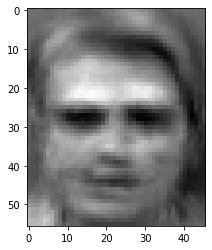

In [43]:
F, A,communality_vector, Psi,eigVal, eigVect, eigenvalues_selected = FA(X.T, 15)

first_PC = F@A
first_PC=first_PC.T[0]
first_PC_array=first_PC.reshape(56,46).real
min_first_PC_array = np.min(first_PC_array)
range_first_PC_array = np.max(first_PC_array) - np.min(first_PC_array)
for i, j in enumerate(first_PC_array):
    first_PC_array[i] = 255 * ((j - min_first_PC_array) / range_first_PC_array)
    
imgplot = plt.imshow(first_PC_array, cmap='gray', vmin=0, vmax=255)
plt.show()